<a href="https://colab.research.google.com/github/markquark125/Summer-MicroCredentials/blob/main/Final_Project_Death_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Identify the Problem

## Will the leading causes of death in the 4 most populous U.S. states increase in the following years?

# Task 2: Load the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

# Task 3: Load the Data

In [2]:
death_df = pd.read_csv('https://raw.githubusercontent.com/markquark125/ML-Data/main/death.csv')

# Task 4: EDA (Exploratory Data Analysis)

In [3]:
death_df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
4,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1


In [4]:
death_df.tail()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
10291,2001,All Causes,All causes,District of Columbia,5951,1049.9
10292,2002,All Causes,All causes,Mississippi,28853,1051.6
10293,2000,All Causes,All causes,Mississippi,28654,1051.9
10294,2000,All Causes,All causes,District of Columbia,6001,1061.2
10295,1999,All Causes,All causes,District of Columbia,6076,1087.3


Each row in the data frame contains a year, complications/description of death, cause of death, US state, number of deaths due to cause, and age-adjusted death rate. Basicaly, a running list of yearly death-counts for a state and the cause of death. For example, in row 1, Vermont had 21 deaths related to kidney disease in 2012.

In [5]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     10296 non-null  int64  
 1   113 Cause Name           10296 non-null  object 
 2   Cause Name               10296 non-null  object 
 3   State                    10296 non-null  object 
 4   Deaths                   10296 non-null  int64  
 5   Age-adjusted Death Rate  10296 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 482.8+ KB



It should be noted that column `113 Cause Name` is not essential for our analysis since column `Cause Name` already provides a concise categorical value, i.e. saying cause of death is "Kidney disease" instead of "Nephritis, nephrotic syndrome and nephrosis". We will drop this column since it is redundant. We will also drop `Age-adjusted Death Rate` since it is not relevant to our analysis.


In [6]:
death_df.drop(['113 Cause Name', 'Age-adjusted Death Rate'], axis = 1, inplace =True)

In [7]:
death_df.describe()

,Year,Deaths
count,10296.000000,1.029600e+04
mean,2007.500000,1.536793e+04
std,5.188379,1.121457e+05
min,1999.000000,2.100000e+01
25%,2003.000000,6.060000e+02
50%,2007.500000,1.704500e+03
75%,2012.000000,5.678000e+03
max,2016.000000,2.744248e+06


Using `.heathmap` to check for any null values. 

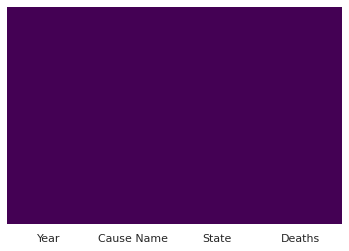

In [8]:
sns.heatmap(death_df.isnull(), yticklabels = False, cbar=False, cmap='viridis')

Using `isnull().value_counts()` to make sure of any null values.

In [9]:
death_df.isnull().value_counts()

Year   Cause Name  State  Deaths
False  False       False  False     10296
dtype: int64

Now let's check for unique values in `Year`, `Cause Name`, and `State` columns.

In [10]:
# Print unique values in 'Year' column
sum = 0
for item in set(death_df['Year']):
    print(item)
    sum += 1
print ('Number of \'Year\' values: ' + str(sum) )

2016
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
Number of 'Year' values: 18


In [11]:
# Print unique values in 'Cause Name' column
sum = 0
for item in set(death_df['Cause Name']):
    print(item)
    sum += 1
print ('Number of \'Cause Name\' values: ' + str(sum) )

CLRD
Stroke
Alzheimer's disease
Diabetes
All causes
Kidney disease
Unintentional injuries
Heart disease
Influenza and pneumonia
Suicide
Cancer
Number of 'Cause Name' values: 11


In [12]:
# Print unique values in 'State' column
sum = 0
for item in set(death_df['State']):
    print(item)
    sum += 1
print ('Number of \'State\' values: ' + str(sum) )

New Mexico
United States
Oregon
North Dakota
Tennessee
Colorado
Wyoming
Washington
North Carolina
Wisconsin
Delaware
Idaho
Utah
Virginia
South Dakota
Massachusetts
New Jersey
Louisiana
Alabama
Ohio
Iowa
New York
Nebraska
Arizona
West Virginia
Pennsylvania
Nevada
Mississippi
New Hampshire
Connecticut
Maryland
Maine
Alaska
Missouri
Minnesota
Florida
Georgia
South Carolina
Kansas
Oklahoma
Hawaii
Vermont
Rhode Island
Montana
California
Indiana
Kentucky
Arkansas
Texas
District of Columbia
Illinois
Michigan
Number of 'State' values: 52


We have data from *all 50 U.S. states and the District of Columbia*. We also have a value `United States` in some of the data. It's possible that this is the default value for `State` as an indication that the death happened in the U.S., though the U.S. state the death occurred in is unknown. The 4 most populous states in the U.S. are California, Texas, Florida, and New York, as of 2022. We will focus our analysis here.

https://worldpopulationreview.com/states
***


The unique causes of death in the data are:
* Heart disease
* Diabetes
* Stroke
* Unintentional injuries
* Alzheimer's disease
* All causes
* Cancer
* Influenza and pneumonia
* Kidney disease
* CLRD (Chronic lower respiratory disease)
* Suicide



> It should be noted that these are leading causes of death in the U.S., according to the CDC. https://www.cdc.gov/nchs/fastats/leading-causes-of-death.htm

> We should also note that the data year-range spans from **1999 to 2016**.




***

We can drop rows. For example, we can drop rows that contain `All causes` as the cause of death because it is ambiguous and it will not help our analysis. We can also drop rows that are **not** New York, Texas, California, or Florida.

In [13]:
# Indices for states we want
keep_Idx = set(death_df[(death_df['State'] == 'New York')].index)
keep_Idx = keep_Idx.union(set(death_df[(death_df['State'] == 'Texas')].index))
keep_Idx = keep_Idx.union(set(death_df[(death_df['State'] == 'California')].index))
keep_Idx = keep_Idx.union(set(death_df[(death_df['State']== 'Florida')].index))


Let us find the indices with `Cause name = All causes` 

In [14]:
# Indices for deaths we want to drop
drop_Idx = set(death_df[(death_df['Cause Name'] == 'All causes')].index)

Find the difference of the two sets; subtract the set of indices with `All causes` from the set of indices with `State == New York | Florida | California | Texas`. Thus, we are left with our cleaned data.

In [15]:
new_Idx = list(set(keep_Idx)- drop_Idx)

death_df = death_df.iloc[new_Idx]

death_df['State'].value_counts()

Texas         180
New York      180
California    180
Florida       180
Name: State, dtype: int64

We can make sure our data is clean now.

In [16]:
print('Causes with \'All causes\' value: ', (death_df['Cause Name'][ death_df['Cause Name'] == 'All causes']).count() )

Causes with 'All causes' value:  0


In [17]:
death_df = death_df.sort_index()
death_df

,Year,Cause Name,State,Deaths
37,2003,Suicide,New York,1169
38,2000,Suicide,New York,1132
42,2005,Suicide,New York,1189
43,2004,Suicide,New York,1187
47,2000,Kidney disease,California,1785
...,...,...,...,...
9280,2003,Heart disease,New York,55276
9305,2002,Heart disease,New York,56672
9314,2001,Heart disease,New York,56643
9331,2000,Heart disease,New York,57474


In [18]:
# death_df['Deaths'].sum()

# Task 5: Data Visualization
Let us see the death count in the U.S.

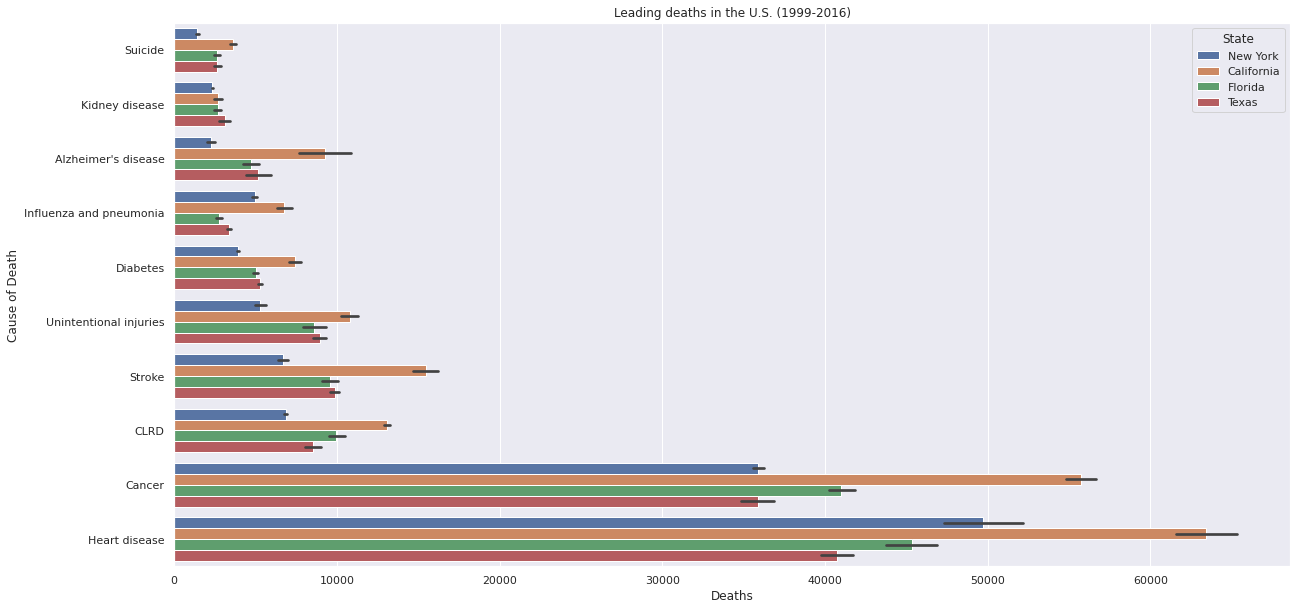

In [19]:

plt.figure(figsize=(20,10))
ax = sns.barplot(x="Deaths", y ="Cause Name", data=death_df, hue='State')
ax.set(xlabel='Deaths', ylabel='Cause of Death')
plt.title("Leading deaths in the U.S. (1999-2016)")
plt.show();

We can see that heart disease and cancer are 2 top causes of death in the U.S.  from 1999 to 2016. We can see the average deaths per cause for each of our states. California leads in death-count, due to it large population. 

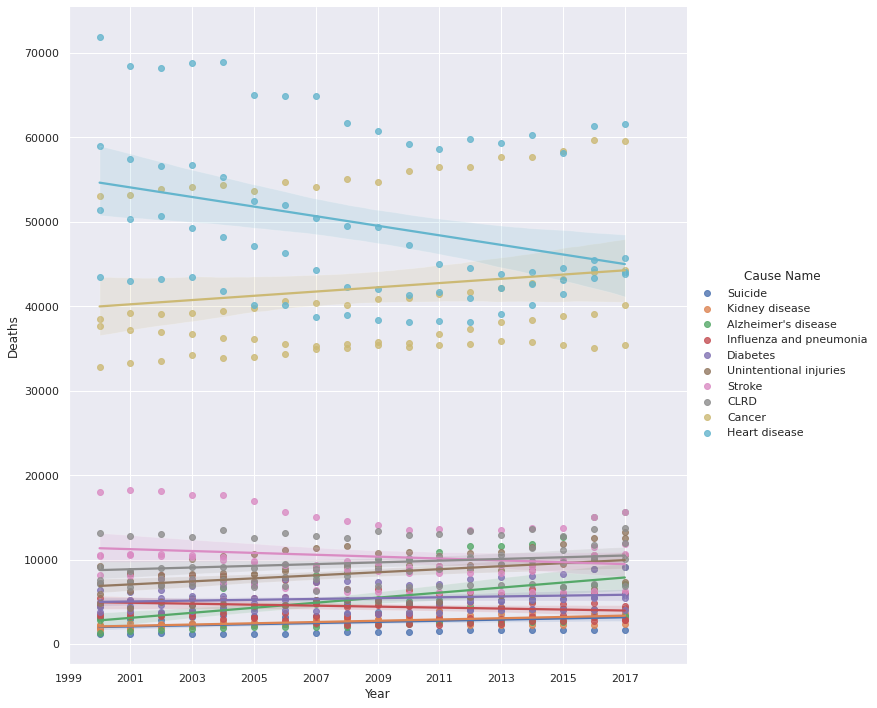

In [20]:
fig = sns.lmplot(x = 'Year', y= 'Deaths', hue = 'Cause Name',data = death_df, height = 10, aspect=1)
fig.set(xlim=(1999, 2017))
fig.set_xticklabels(['1999','2001','2003','2005','2007','2009','2011','2013','2015','2017'])

We can see the trend for leading causes of death in the four most populous states in the U.S. Some causes, like kidney disease and suicide, seem to keep a steady rate, not growing or decreasing in case-counts. Other causes like cancer and Alzheimer's disease have yearly increases in case-counts, while other causes like heart disease and stroke have decreased over the years. We can also see that heart disease is the leading cause of death in all four states.

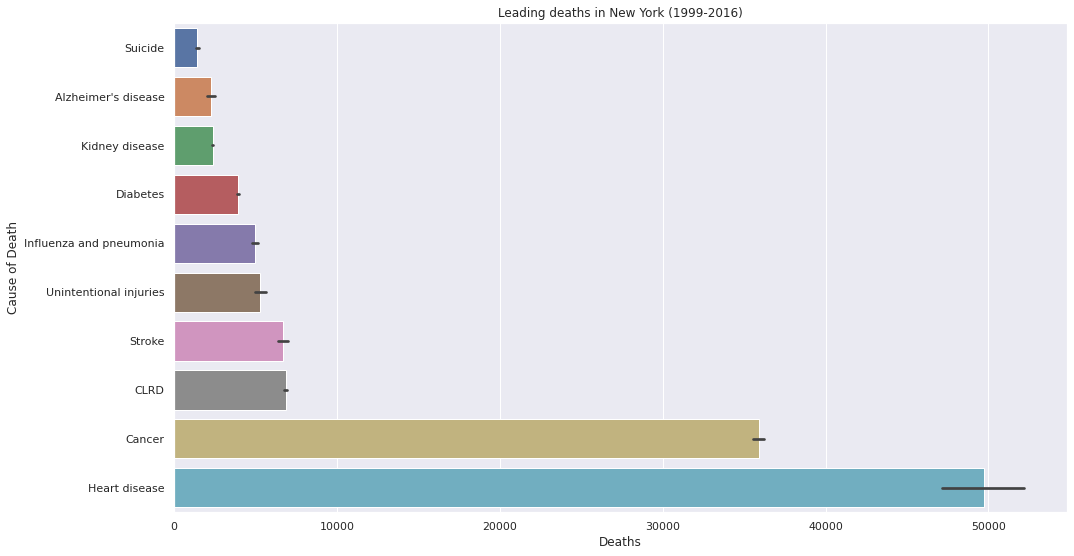

In [22]:

plt.figure(figsize=(16,9))
ax = sns.barplot(x="Deaths", y ="Cause Name", data=death_df[death_df['State']=='New York'])
ax.set(xlabel='Deaths', ylabel='Cause of Death')
plt.title("Leading deaths in New York (1999-2016)")
plt.show();

A view of New York state data. Looks like heart disease and cancer are leading causes of death, by a large margin. This makes sense given the barplot we've made earlier of the 4 most populous U.S. states.

# Task 6: Logistic Regression




In [23]:
# death_df.info()

In [24]:
#death_df['Cause Name'].unique()

In [25]:
#death_df['State'].unique()

Lets encode the some of the data for ML algorithms.

In [26]:
death_df['State'] = death_df['State'].replace(['New York','California','Florida','Texas'], (0,1,2,3) )
death_df['Cause Name'] = death_df['Cause Name'].replace(['Suicide','Kidney disease', "Alzheimer's disease", 'Influenza and pneumonia','Diabetes', 'Unintentional injuries', 'Stroke', 'CLRD', 'Cancer','Heart disease'], (0,0,0,0,0,0,0,0,0,1))

In [27]:
# A copy for Decision Tree algorithm later.
dtree_death_df = death_df.copy(deep=True)
dtree_death_df

,Year,Cause Name,State,Deaths
37,2003,0,0,1169
38,2000,0,0,1132
42,2005,0,0,1189
43,2004,0,0,1187
47,2000,0,1,1785
...,...,...,...,...
9280,2003,1,0,55276
9305,2002,1,0,56672
9314,2001,1,0,56643
9331,2000,1,0,57474


We want to see if we can classify a cause of death for heart disease. It is most the prevalant cause of death so it should be accurate.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


## First Data Split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(death_df.drop(['Cause Name'],axis=1), death_df['Cause Name'], test_size=0.15, random_state=1)

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [106]:
predictions = logmodel.predict(X_test)
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        95
           1       0.50      0.15      0.24        13

    accuracy                           0.88       108
   macro avg       0.70      0.57      0.58       108
weighted avg       0.85      0.88      0.85       108



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


## Second Data Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(death_df.drop(['Cause Name'],axis=1), death_df['Cause Name'], test_size=0.25, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       160
           1       0.64      0.35      0.45        20

    accuracy                           0.91       180
   macro avg       0.78      0.66      0.70       180
weighted avg       0.89      0.91      0.89       180



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


## Third Data Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(death_df.drop(['Cause Name'],axis=1), death_df['Cause Name'], test_size=0.33,  random_state=1)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       209
           1       0.59      0.34      0.43        29

    accuracy                           0.89       238
   macro avg       0.75      0.66      0.69       238
weighted avg       0.87      0.89      0.88       238



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


Seems like the most accurate assesement for the Logistic Regression algorithm is with `test_size=0.25`.

# Task 7: KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


Just want to rearrage the dataframe for easier processing.

In [35]:
columns_titles = ["Year","State","Deaths", "Cause Name"]
death_df=death_df.reindex(columns=columns_titles)
#death_df

Now to scale our data.

In [36]:
scaler = StandardScaler()
scaler.fit(death_df.drop(['Cause Name'], axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
scaled_features = scaler.transform(death_df.drop(['Cause Name'], axis=1))
df_feat = pd.DataFrame(scaled_features, columns=death_df.columns[:-1])
df_feat

,Year,State,Deaths
0,-0.867365,-1.341641,-0.767771
1,-1.445608,-1.341641,-0.769971
2,-0.481869,-1.341641,-0.766582
3,-0.674617,-1.341641,-0.766701
4,-1.445608,-0.447214,-0.731146
...,...,...,...
715,-0.867365,-1.341641,2.449197
716,-1.060113,-1.341641,2.532197
717,-1.252861,-1.341641,2.530473
718,-1.445608,-1.341641,2.579880


In [38]:
df_feat.describe()

,Year,State,Deaths
count,7.200000e+02,7.200000e+02,720.000000
mean,-1.110223e-17,-1.973730e-17,0.000000
std,1.000695e+00,1.000695e+00,1.000695
min,-1.638356e+00,-1.341641e+00,-0.769971
25%,-8.673650e-01,-6.708204e-01,-0.625836
50%,0.000000e+00,0.000000e+00,-0.432233
75%,8.673650e-01,6.708204e-01,-0.082069
max,1.638356e+00,1.341641e+00,3.439372


## First Data Split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(scaled_features, death_df['Cause Name'], test_size=0.15, random_state=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))

In [ ]:
error_rate = []
# Will take some time
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test));

Text(0, 0.5, 'Error Rate')

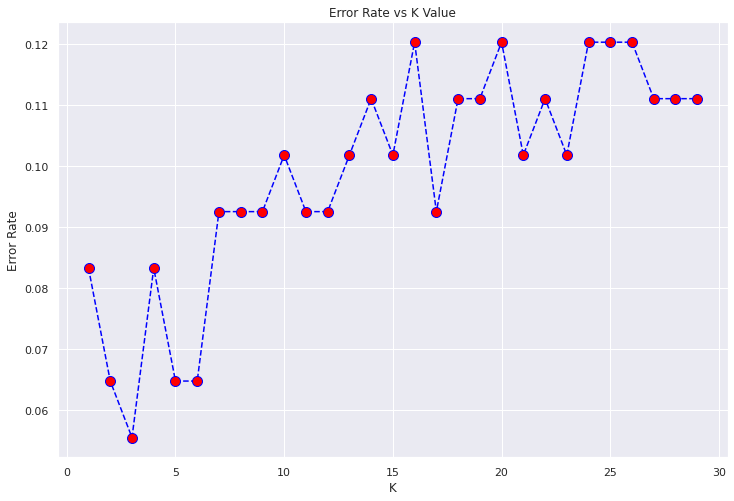

In [109]:
plt.figure(figsize=(12,8))
plt.plot(range(1,30), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [110]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('With k = 3')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

With k = 3
[[94  1]
 [ 5  8]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        95
           1       0.89      0.62      0.73        13

    accuracy                           0.94       108
   macro avg       0.92      0.80      0.85       108
weighted avg       0.94      0.94      0.94       108



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


## Second Data Split

In [111]:
X_train,X_test, y_train, y_test = train_test_split(scaled_features, death_df['Cause Name'], test_size=0.25,random_state=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))

[[155   5]
 [  7  13]]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


In [ ]:
error_rate = []
# Will take some time
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

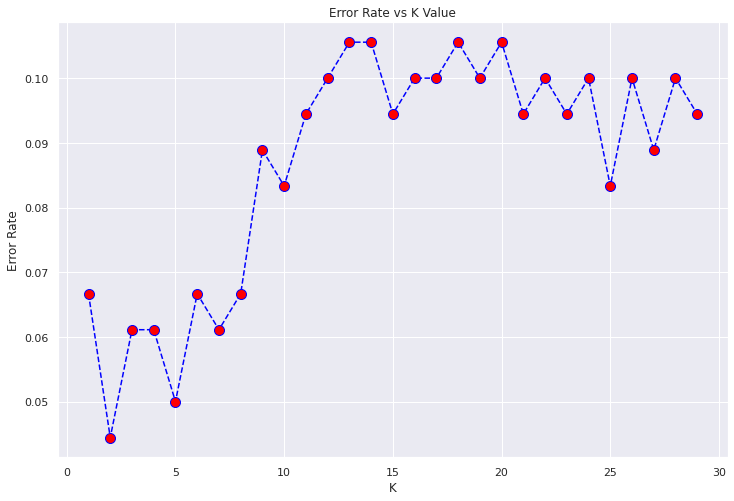

In [113]:
plt.figure(figsize=(12,8))
plt.plot(range(1,30), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [114]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('With k = 2')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

With k = 2
[[160   0]
 [  8  12]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       160
           1       1.00      0.60      0.75        20

    accuracy                           0.96       180
   macro avg       0.98      0.80      0.86       180
weighted avg       0.96      0.96      0.95       180



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


## Third Data Split

In [47]:
X_train,X_test, y_train, y_test = train_test_split(scaled_features, death_df['Cause Name'], test_size=0.33,random_state=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))

[[205   4]
 [  9  20]]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


In [ ]:
error_rate = []
# Will take some time
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

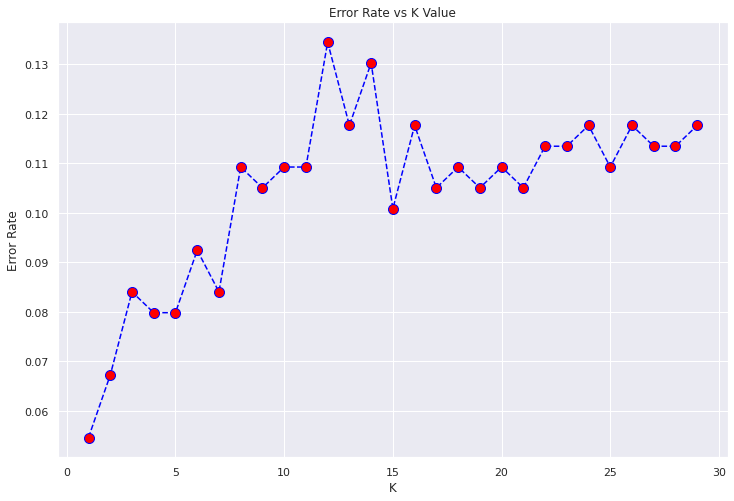

In [49]:
plt.figure(figsize=(12,8))
plt.plot(range(1,30), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [50]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('With k = 1')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

With k = 1
[[205   4]
 [  9  20]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       209
           1       0.83      0.69      0.75        29

    accuracy                           0.95       238
   macro avg       0.90      0.84      0.86       238
weighted avg       0.94      0.95      0.94       238



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


As we've seen from the graphs, KNN is best with `k < 5`, else the error rate increases. We can see again that with `test_size=0.25` we get the lowest error rate of all three test splits, at `k = 2` we have a high accuracy.

# Task 8: Decision Tree

In [51]:
from sklearn.tree.tree import DecisionTreeClassifier

In [64]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [52]:
#!pip install pydot
#!pip install pydot-ng
#!pip install graphviz
#!pip install --upgrade scikit-learn==0.21.3
# Error for last one is because we are using an older scikit 

In [90]:
X = dtree_death_df.drop('Cause Name', axis=1)
y = dtree_death_df['Cause Name']

## First Data Split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15)

In [92]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [93]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        97
           1       0.89      0.73      0.80        11

    accuracy                           0.96       108
   macro avg       0.93      0.86      0.89       108
weighted avg       0.96      0.96      0.96       108



In [94]:
features = list(death_df.columns[:-1])
features

['Year', 'State', 'Deaths']

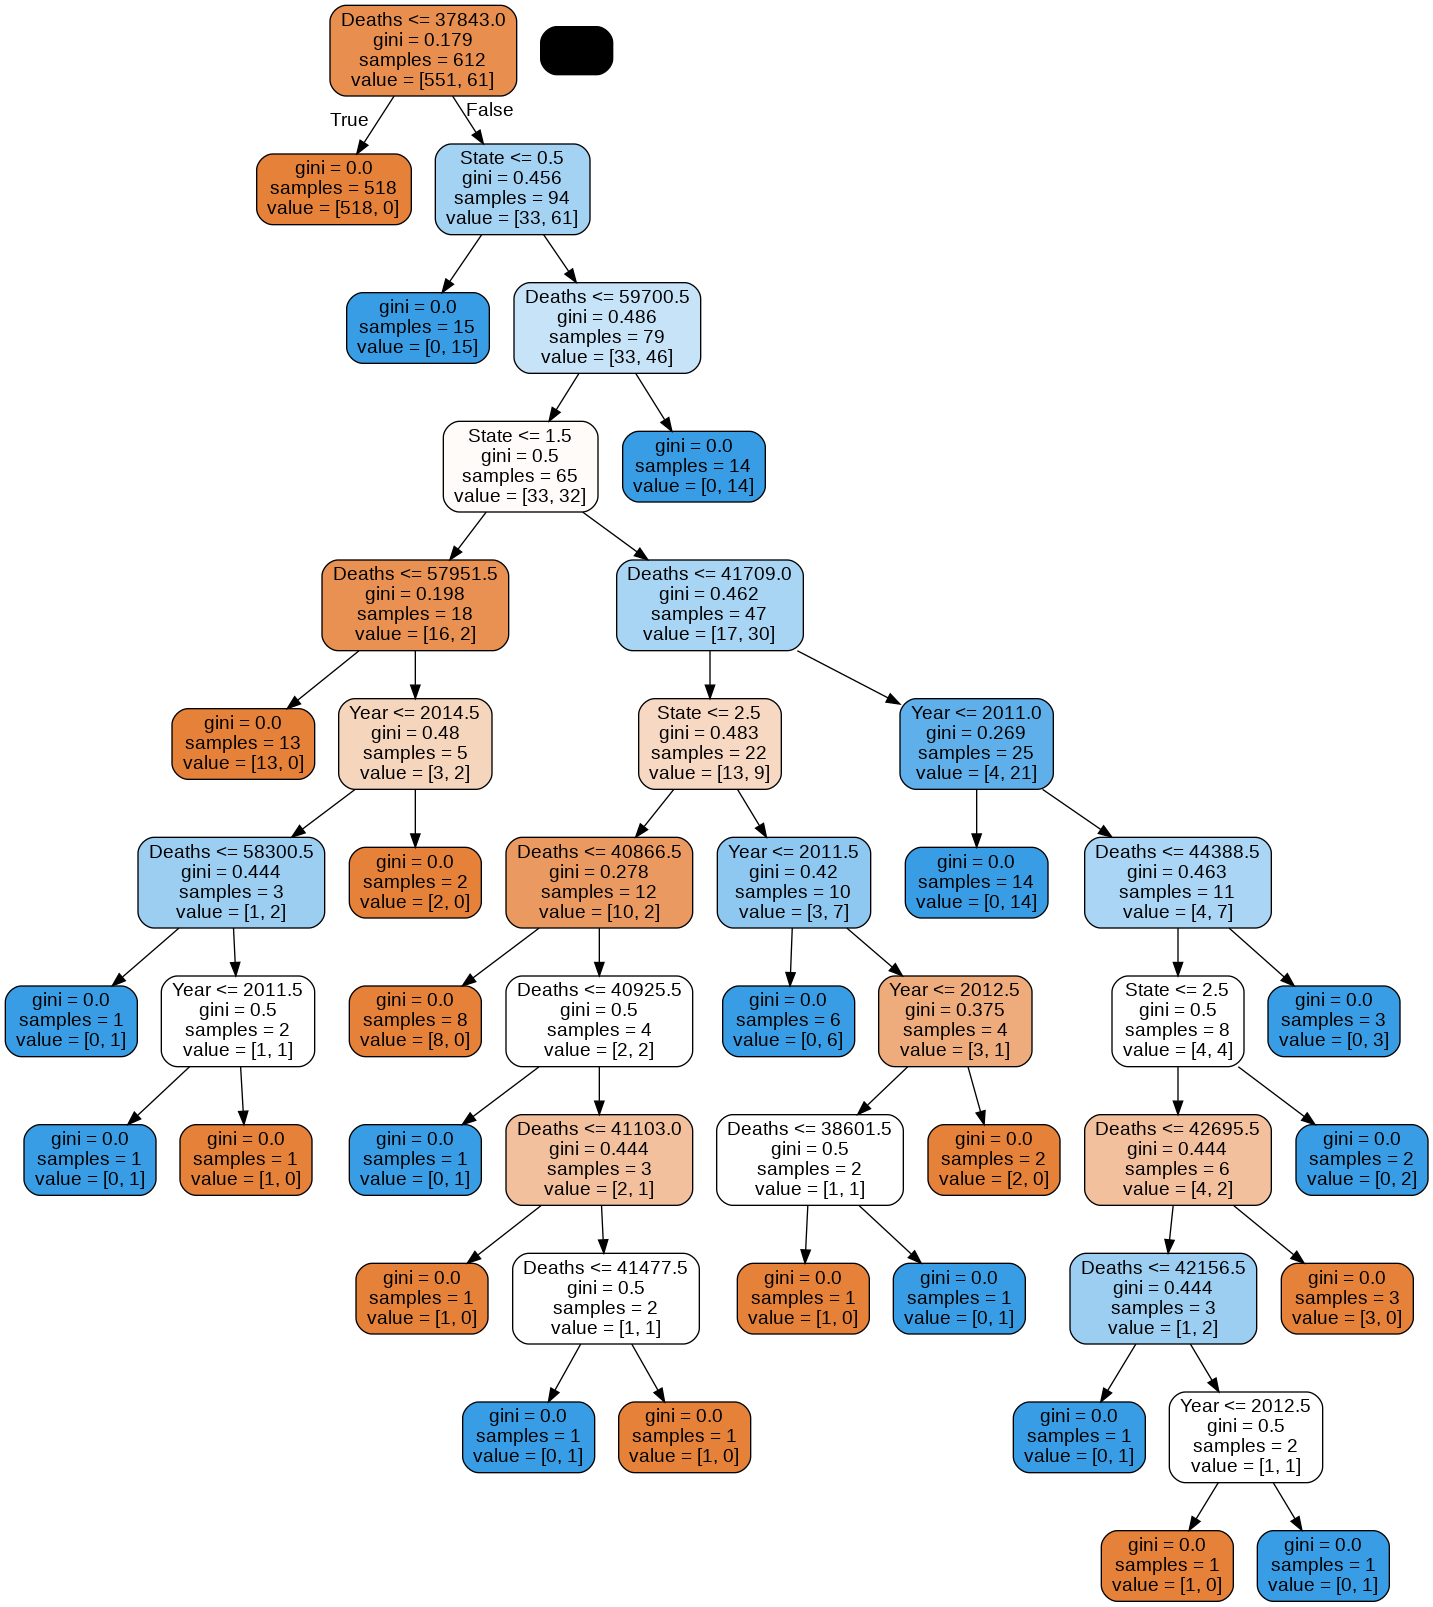

In [95]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## Second Data Split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [97]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       162
           1       0.79      0.61      0.69        18

    accuracy                           0.94       180
   macro avg       0.87      0.80      0.83       180
weighted avg       0.94      0.94      0.94       180



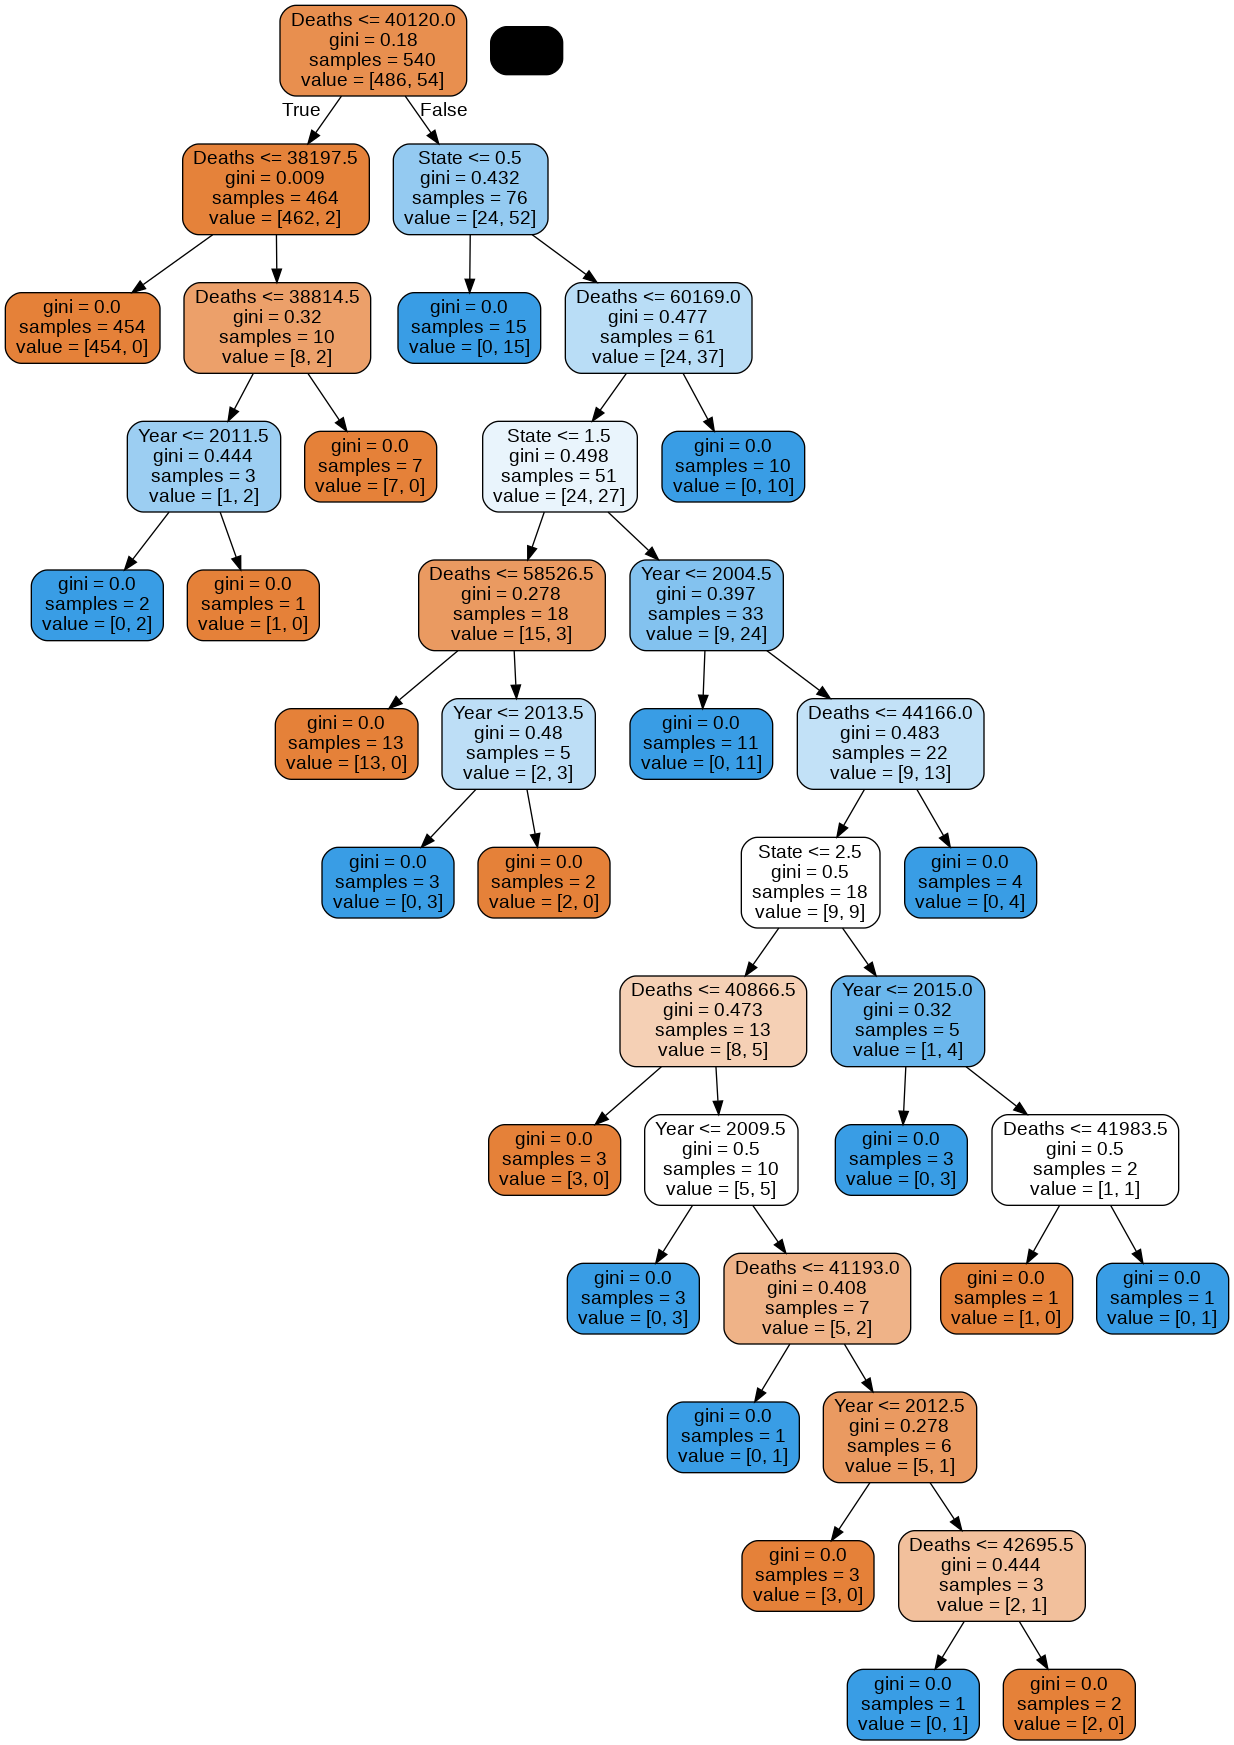

In [98]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## Third Data Split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [100]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [101]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       212
           1       0.75      0.81      0.78        26

    accuracy                           0.95       238
   macro avg       0.86      0.89      0.87       238
weighted avg       0.95      0.95      0.95       238



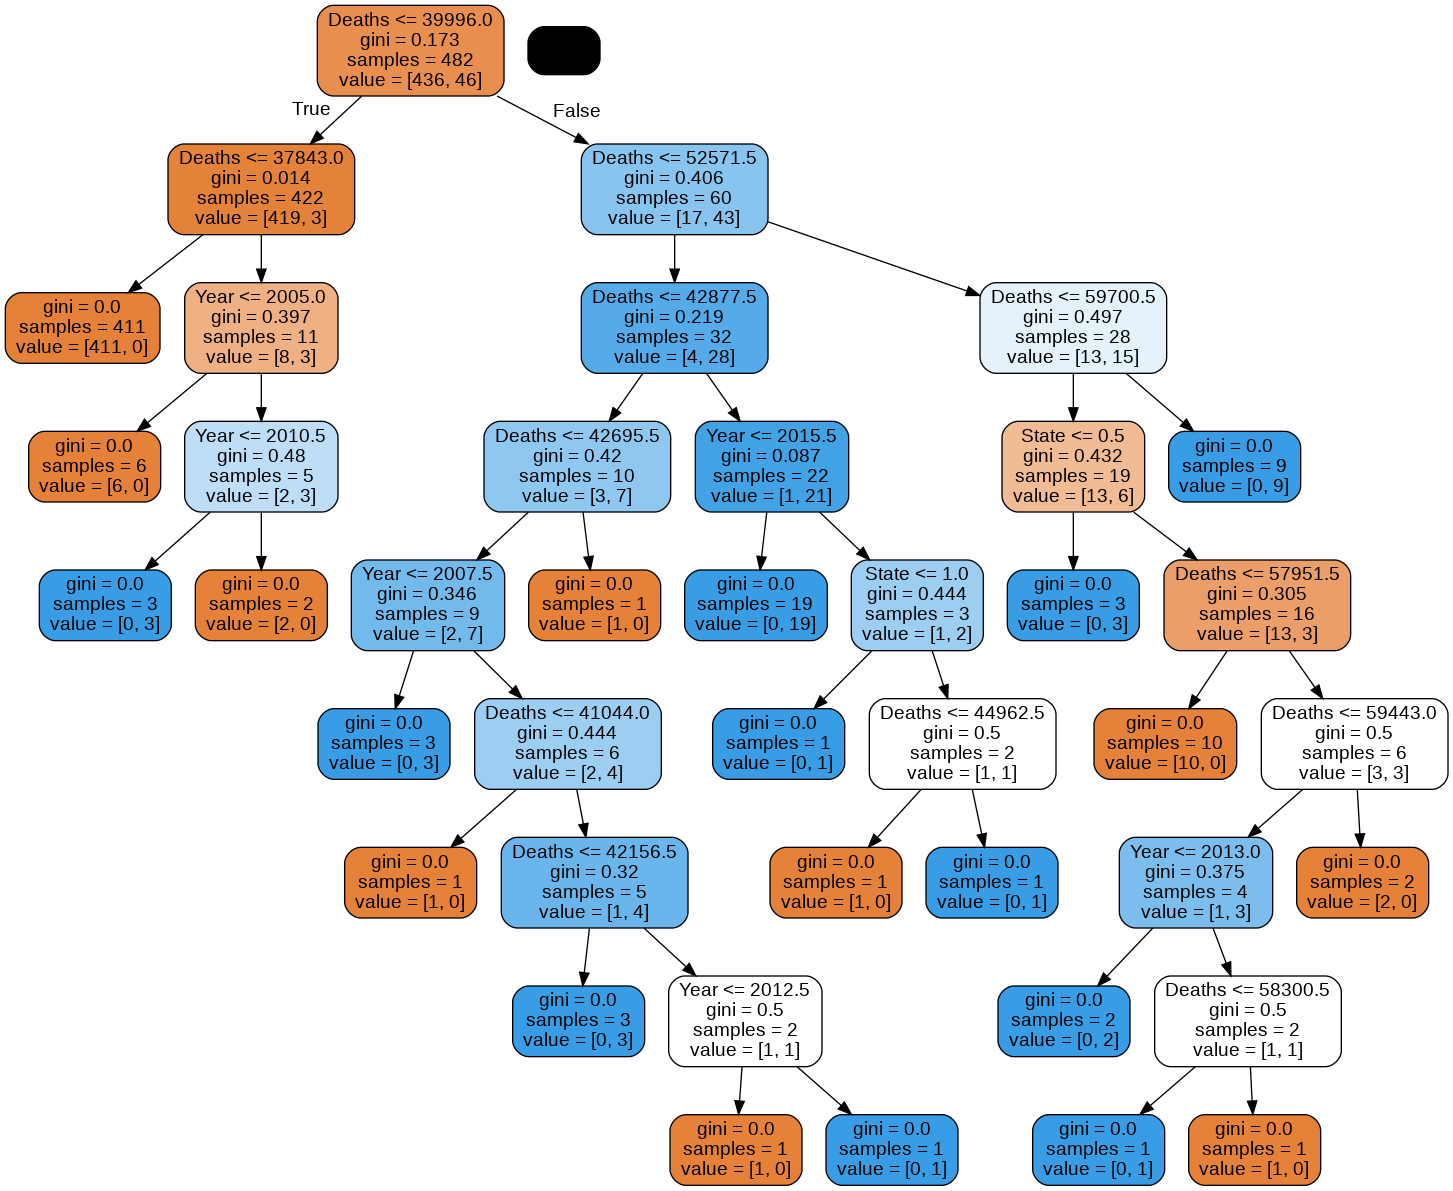

In [102]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

With the Decision Tree algorithm, we seem to have a high accuracy with `test_size = 0.25`, similar to the previous two algorithms.

# Task 9: Conclusion

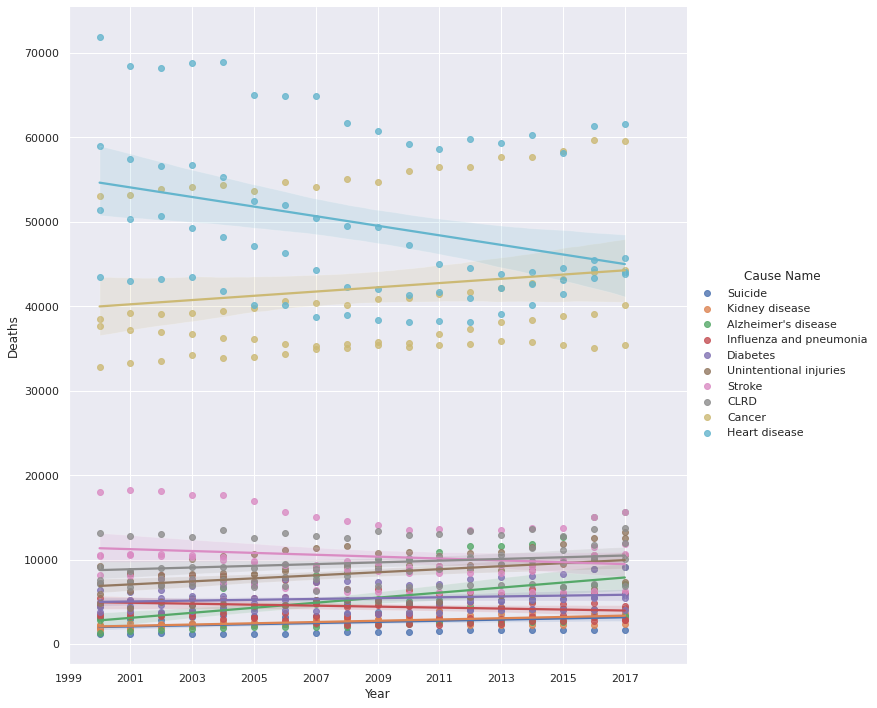

In [ ]:
fig = sns.lmplot(x = 'Year', y= 'Deaths', hue = 'Cause Name',data = death_df, height = 10, aspect=1)
fig.set(xlim=(1999, 2017))
fig.set_xticklabels(['1999','2001','2003','2005','2007','2009','2011','2013','2015','2017'])

As we can see, while cancer and heart disease are the top 2 leading causes of death in the four most populous states, they have different trends. Heart disease death-cases seems to have lowered over the years while cancer cases have increased. Alzheimer's disease cases have also increased. 